# AlexNet Training Notebook

本 notebook 演示如何使用 `train/train_alexnet.py` 中封装的函数进行：

1. 数据加载
2. 模型训练与评估
3. 训练指标可视化
4. 超参数网格搜索实验
5. 实验结果对比与平行坐标图可视化


In [1]:
# 如果你的 notebook 已经在 PyTorch_Learning/notebooks 里启动
import os
import sys

from utils import PROJECT_ROOT

# 确保能 import utils/ 和 train/ 里的模块
sys.path.append(os.path.abspath(".."))
print("项目根目录：", os.path.abspath(".."))

# 输出目录
outputs_dir = os.path.join(PROJECT_ROOT, "outputs")
print("Outputs 目录：", outputs_dir)

from train.train_alexnet import get_cifar10_loader

# 构造数据加载器
train_loader = get_cifar10_loader(train=True)
test_loader  = get_cifar10_loader(train=False)


项目根目录： C:\Users\WHY\Projects\Personal\PyTorch_Learning
Outputs 目录： C:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs


100.0%


Extracting C:\Users\WHY\Projects\Personal\PyTorch_Learning\data\cifar-10-python.tar.gz to C:\Users\WHY\Projects\Personal\PyTorch_Learning\data
Files already downloaded and verified


[AlexNet] Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

=== Epoch 1 ===
[12800/50000] loss: 2.2136
[25600/50000] loss: 1.8751
[38400/50000] loss: 1.6361
Val loss: 1.3437, Acc: 50.29%
  → loss improved, saved to C:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\alexnet\alexnet_best.pth

=== Epoch 2 ===
[12800/50000] loss: 1.3617
[25600/50000] loss: 1.2758
[38400/50000] loss: 1.1468
Val loss: 1.0452, Acc: 62.87%
  → loss improved, saved to C:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\alexnet\alexnet_best.pth

=== Epoch 3 ===
[12800/50000] loss: 0.9856
[25600/50000] loss: 0.9563
[38400/50000] loss: 0.8841
Val loss: 0.8539, Acc: 71.10%
  → loss improved, saved to C:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\alexnet\alexnet_best.pth
Metrics: [(1.343684935569763, 50.29), (1.045209608078003, 62.87), (0.8538624042272568, 71.1)]


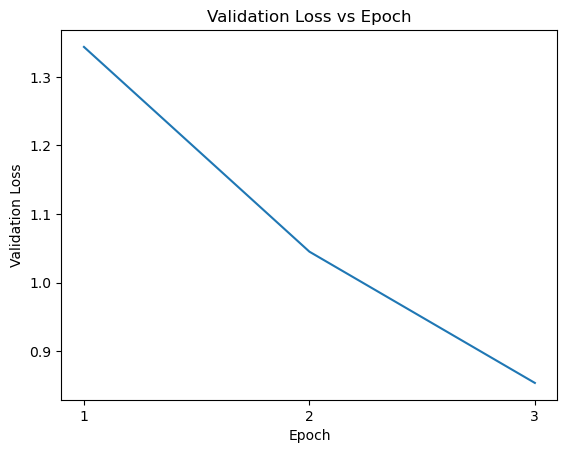

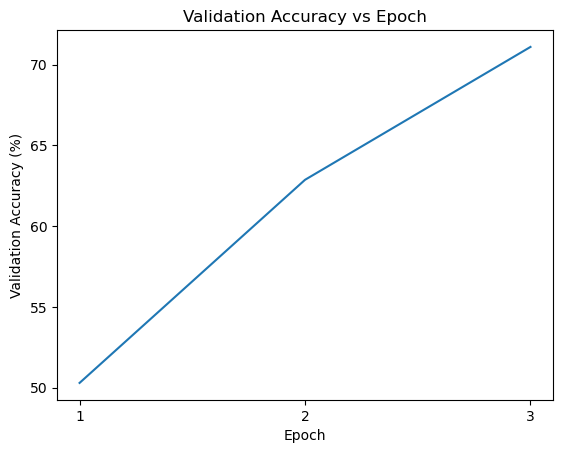

In [2]:
from train.train_alexnet import run_alexnet_training
from utils.visualization import plot_training_metrics

# run_alexnet_training 返回 [(val_loss, val_acc), ...]
metrics = run_alexnet_training(epochs=3, log_interval=200)
print("Metrics:", metrics)

# 可视化并保存
metrics_dir = os.path.join(outputs_dir, "alexnet_metrics")
plot_training_metrics(metrics, save_path=metrics_dir)


In [3]:
from train.train_alexnet import run_alexnet_training
from utils.experiment import save_experiment_results

# 定义超参数网格
param_grid = [
    {"lr": 0.1,   "momentum": 0.9,  "batch_size": 64,  "weight_decay": 0,    "patience": 3, "min_delta": 0.0},
    {"lr": 0.1,   "momentum": 0.95, "batch_size": 64,  "weight_decay": 1e-4, "patience": 3, "min_delta": 1e-3},
    {"lr": 0.01,  "momentum": 0.9,  "batch_size": 128, "weight_decay": 1e-5, "patience": 5, "min_delta": 0.0},
    {"lr": 0.01,  "momentum": 0.95, "batch_size": 128, "weight_decay": 1e-4, "patience": 5, "min_delta": 1e-3},
    {"lr": 0.001, "momentum": 0.9,  "batch_size": 256, "weight_decay": 0,    "patience": 7, "min_delta": 0.0},
]

all_results = []
for cfg in param_grid:
    metrics = run_alexnet_training(
        epochs=20,
        train_batch_size=cfg["batch_size"],
        test_batch_size=100,
        lr=cfg["lr"],
        momentum=cfg["momentum"],
        weight_decay=cfg["weight_decay"],
        patience=cfg["patience"],
        min_delta=cfg["min_delta"],
        log_interval=200,
        output_dir=os.path.join(
            PROJECT_ROOT,
            "outputs",
            "alexnet",
            f"lr{cfg['lr']}_mom{cfg['momentum']}_bs{cfg['batch_size']}_pat{cfg['patience']}"
        )
    )
    all_results.append({"config": cfg, "metrics": metrics})

# 保存所有实验结果到 JSON
save_experiment_results(
    all_results,
    os.path.join(outputs_dir, "alexnet_experiment_results.json")
)

from utils.visualization import plot_experiment_comparison

# 对比不同配置的最终验证准确率
plot_experiment_comparison(all_results, metric="accuracy")


[AlexNet] Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

=== Epoch 1 ===


KeyboardInterrupt: 

In [ ]:
from utils import plot_hyperparam_parallel
from utils.experiment import load_experiment_results

# 加载并可视化
results = load_experiment_results(os.path.join(outputs_dir, "alexnet_experiment_results.json"))
plot_hyperparam_parallel(results)
